# インタフェース分離の原則（**I**nterface Segregation Principle：ISP）


**クライアントに、クライアントが利用しないメソッドへの依存を強制してはならない**

オンライン学習サービスにおける次のコードは、ISPに違反している

In [ ]:
from abc import ABC, abstractmethod

class Course(ABC):
    # 共通のメソッド
    @abstractmethod
    def view_lecture(self) -> None:
        pass

    # 講師専用のメソッド
    @abstractmethod
    def add_lecture(self, content_name: str) -> None:
        pass

    # 生徒専用のメソッド
    @abstractmethod
    def review_course(self) -> None:
        pass

class CourseFromInstructors(Course):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        # レクチャー作成処理
        print(f'新規レクチャー「{content_name}」を作成しました')

    #! このメソッドは講師にとっては不要
    def review_course(self) -> None:
        pass # 講師はレビュー出来ないので実装しない

class CourseFromStudents(Course):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    #! このメソッドは生徒にとっては不要
    def add_lecture(self, content_name: str) -> None:
        pass # 生徒はレクチャーを追加出来ないので実装しない

    def review_course(self) -> None:
        print('コースのレビューをおねがいします')
        # レビューの投稿処理

上記のコードでは、

講師と生徒のそれぞれしか使わないメソッドが、抽象クラスCourseで定義されているため、

具象クラスが使わないメソッドに依存することを強制してしまっている

*   講師にとっては、review_courseメソッドが不要
*   生徒にとっては、add_lectureメソッドが不要

⇒　ISPに違反している


ISPに違反すると、次の問題が発生する可能性が高い

*   不要な依存関係が生まれるので、クラス間の結合度が高まる
*   インターフェース（抽象クラス）が大きくなり、SRPに違反する
		
		(例だと生徒専用のadd_lectureメソッドと講師専用のreview_courseメソッドの両方があって、そのため2つ以上の変更が必要になるというSRPに違反する理由)
*   サブクラスでメソッドを退化させる（事後条件を弱める）ことになり、LSPに違反する

		(親クラスで保証されたメソッド終了時の状態が、サブクラスでは保証されなくなるLSPに違反する)

⇒　コードの変更がしづらくなる

## ISPを守る2つの方法

ISPに違反したコードを改善するには、

次の2つの方法を使って、巨大化したインターフェースを分割する

*   **多重継承を使う**
*   **コンポジションを使う**

### 多重継承を使う方法

**複数の親クラスを継承すること**を、多重継承といい、

Pythonでは多重継承が許可されている（禁止されている言語もある）

上記の例を多重継承を使ってインターフェースの分離の原則を解決するために、Courseという抽象クラスをさらに2つに分割して、合計3つの抽象クラスにする。

抽象クラスは、Course、InstructorCourseInterface、StudentCourseInterfaceの3つになる。

Courseは共通のメソッドだけを持ち、講師だけに必要なメソッド"add_lecture"は、講師のためだけのインターフェースInstructorCourseInterfaceに持たせ、生徒だけが使うメソッド"review_course"は、生徒のためだけのインターフェースStudentCourseInterfaceに持たせるよう定義する。

講師クラスCourseFromInstructorsは、CourseとInstructorCourseInterfaceを継承する。

生徒クラスCourseFromStudentsは、CourseとStudentCourseInterfaceを継承する。

そうすれば、講師と生徒はそれぞれ必要な機能だけをオーバーライドして使用することができる。

結果↓

講師はview_lectureとadd_lectureを実装することができる。

生徒はview_lectureとreview_courseを実装することができる。

In [ ]:
from abc import ABC, abstractmethod

# 講師も生徒も視聴可能
class Course(ABC):
    # 共通のメソッド
    @abstractmethod
    def view_lecture(self) -> None:
        pass

#　講師用と生徒用にそれぞれインターフェースを用意する
class InstructorCourseInterface(ABC):
    @abstractmethod
    def add_lecture(self, content_name: str) -> None:
        pass

class StudentCourseInterface(ABC):
    @abstractmethod
    def review_course(self) -> None:
        pass

# 多重継承して必要な機能だけを用意する
class CourseFromInstructors(Course, InstructorCourseInterface):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        # レクチャー作成処理
        print(f'新規レクチャー「{content_name}」を作成しました')

class CourseFromStudents(Course, StudentCourseInterface):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def review_course(self) -> None:
        print('コースのレビューをおねがいします')
        # レビューの投稿処理

### コンポジションを使う方法

継承とコンポジションを組み合わせることも可能

Courseクラスを共通のインターフェースとして定義し、講師と生徒が共通して持つメソッド"view_lecture"のみを定義する。

そして、講師用のメソッドadd_lectureを持つInstructorBehaviourクラスと、生徒用のメソッドreview_courseを持つStudentBehaviourクラスをそれぞれ定義する。

そうすれば、講師クラスCourseFromInstructorsと生徒クラスCourseFromStudentsは、それぞれ必要な機能だけをコンポジションして使用することができる。

講師はCourseFromInstructorsクラスをインスタンス化した時に、InstructorBehaviourクラスをコンポジションする
		
		(CourseFromInstructorのインスタンス化時にInstructorBehaviourも同時にCourseFromInstructors内でインスタンス化して、InstructorBehaviour内のメソッドが使えるようにする)。

生徒はCourseFromStudentsクラスをインスタンス化した時に、StudentBehaviourクラスをコンポジションする
		
		(CourseFromStudentsのインスタンス化時にStudentBehaviourも同時にCourseFromStudents内でインスタンス化して、StudentBehaviour内のメソッドが使えるようにする)。

結果↓

講師はview_lectureとadd_lectureを実装することができる。

生徒はview_lectureとreview_courseを実装することができる。

In [ ]:
from abc import ABC, abstractmethod

# 共通のインターフェース
class Course(ABC):
    @abstractmethod
    def view_lecture(self) -> None:
        pass

class InstructorBehaviour:
    def add_lecture(self, content_name: str) -> None:
        print(f'新規レクチャー「{content_name}」を作成しました')

class StudentBehaviour:
    def review_course(self) -> None:
        print('コースのレビューをおねがいします')

class CourseFromInstructors(Course):
    def __init__(self) -> None:
        self.instructor_behaviour = InstructorBehaviour()

    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        self.instructor_behaviour.add_lecture(content_name)

class CourseFromStudents(Course):
    def __init__(self) -> None:
        self.student_behaviour = StudentBehaviour()

    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def review_course(self) -> None:
        self.student_behaviour.review_course()

コンポジションを使うと、Strategyパターンを使って、

アルゴリズムを切り替えることも出来る

In [ ]:
from abc import ABC, abstractmethod

# 共通のインターフェース
class Course(ABC):
    @abstractmethod
    def view_lecture(self) -> None:
        pass

# Strategyパターン
class StudentBehaviour(ABC):
    @abstractmethod
    def review_course(self) -> None:
        pass

class FreeStudentBehaviour(StudentBehaviour):
    def review_course(self) -> None:
        print('無料で入手したコースにはレビューできません')

class PaidStudentBehaviour(StudentBehaviour):
    def review_course(self) -> None:
        print('コースのレビューをおねがいします')
        # レビューの投稿処理

# コンストラクタで生徒の種別を選択
class CourseFromStudents(Course):
    def __init__(self, student_behaviour: StudentBehaviour) -> None:
        self.student_behaviour = student_behaviour

    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 生徒用の動画再生の処理

    def review_course(self) -> None:
        self.student_behaviour.review_course()

free_student_behaviour = FreeStudentBehaviour()
paid_student_behaviour = PaidStudentBehaviour()

# 無料で入手した生徒のコースインターフェース
course_form_free_student = CourseFromStudents(free_student_behaviour)

# 有料で入手した生徒のコースインターフェース
course_form_paid_student_ = CourseFromStudents(paid_student_behaviour)

## インターフェースのクライアントから見た時のISP

ISPに違反したインターフェースは、

**インターフェースのクライアントにとって、**

**必要のないメソッドを公開する**ことになる

In [ ]:
from abc import ABC, abstractmethod

# インターフェース
class Course(ABC):
    # 共通のメソッド
    @abstractmethod
    def view_lecture(self) -> None:
        pass

    # 講師専用のメソッド
    @abstractmethod
    def add_lecture(self, content_name: str) -> None:
        pass

    # 生徒専用のメソッド
    @abstractmethod
    def review_course(self) -> None:
        pass


class CourseFromInstructors(Course):
    def view_lecture(self) -> None:
        print('視聴を開始します')
        # 講師用の動画再生の処理

    def add_lecture(self, content_name: str) -> None:
        # レクチャー作成処理
        print(f'新規レクチャー「{content_name}」を作成しました')

    def review_course(self) -> None:
        pass # 講師はレビュー出来ないので実装しない

# クライアント
course_from_instructor = CourseFromInstructors()
course_from_instructor.add_lecture('SOLID原則とは')
# 講師は自分でレビューはできない仕様。
# しかし、講師を表すCourseFromInstructorsクラスからはreview_courseメソッドが使用できないはずだが、review_courseメソッドを呼び出せてしまう問題がある
course_from_instructor.review_course()

新規レクチャー「SOLID原則とは」を作成しました


ISPに違反しているクラスは、

クライアントが使用しないメソッドを公開してしまう（公開は「潜在的な依存」）


**ちょっとクイズ**

以下の複合機を表現するコードは、ISPに違反しているでしょうか？

In [ ]:
# 複合機クラス
class MultifunctionPrinter:
    def print_document(self, document: Document) -> None:
        print(f'プリントを開始します')
        # プリントの処理

    def copy_document(self, document: Document) -> None:
        print(f'コピーを開始します')
        # コピーの処理

# ドキュメントの値オブジェクト
class Document:
    def __init__(self, content: str):
        self.content = content

In [ ]:
# クライアント
class PrintClient:
    def __init__(self, printer: MultifunctionPrinter):
        self.printer = printer

    def execute(self, document: Document) -> None:
        self.printer.print_document(document)

class CopyClient:
    def __init__(self, printer: MultifunctionPrinter):
        self.printer = printer

    def execute(self, document: Document) -> None:
        self.printer.copy_document(document)

MultifunctionPrinter（複合機）クラスは、

*   プリントを行うクライアント
*   コピーを行うクライアント

という2種類のクライアントを持っている

上記の設計では、プリントを行うクライアントが必要としない、

コピー用のメソッドが公開されているため、ISPに違反していると言える

クライアントごとにインターフェースを分けて、

次のようにした方が望ましいと考えられる

In [ ]:
# インターフェースの分離の一例
from abc import ABC, abstractmethod

# プリントの機能のみを提供するインターフェース
class PrintInterface(ABC):
    @abstractmethod
    def print_document(self, document: Document) -> None:
        pass

# コピーの機能のみを提供するインターフェース
class CopyInterface(ABC):
    @abstractmethod
    def copy_document(self, document: Document) -> None:
        pass

class MultifunctionPrinter(PrintInterface, CopyInterface):
    def print_document(self, document: Document) -> None:
        print(f'プリントを開始します')
        # プリントの処理

    def copy_document(self, document: Document) -> None:
        print(f'コピーを開始します')
        # コピーの処理

In [ ]:
# クライアント
class PrintClient:
    def __init__(self, printer: PrintInterface): # コピーの機能に依存しなくてよくなる
        self.printer = printer

    def execute(self, document: Document) -> None:
        self.printer.print_document(document)

class CopyClient:
    def __init__(self, copier: CopyInterface): # プリントの機能に依存しなくてよくなる
        self.copier = copier

    def execute(self, document: Document) -> None:
        self.copier.copy_document(document)

## ISPを学んだ時によくある反応


「必要のないメソッドが公開されていたとしても、


　クライアントが使わないようにすれば良いのでは？」

この方針がおすすめでない理由は、

*   **フールプルーフ**
*   **Hyrumの法則**


の2つの観点から説明できる

### フールプルーフ

**使わないものは、使えないようにしておく**方が、

フールプルーフの観点からは望ましいと言える

例えるなら、

「スクラップのときにしか使わない爆破ボタン」が

ヘッドレストについている車を納車されたらどう思うか？

⇒　「スクラップのときにしか使わないなら、廃車になるまで隠しておけよ！」

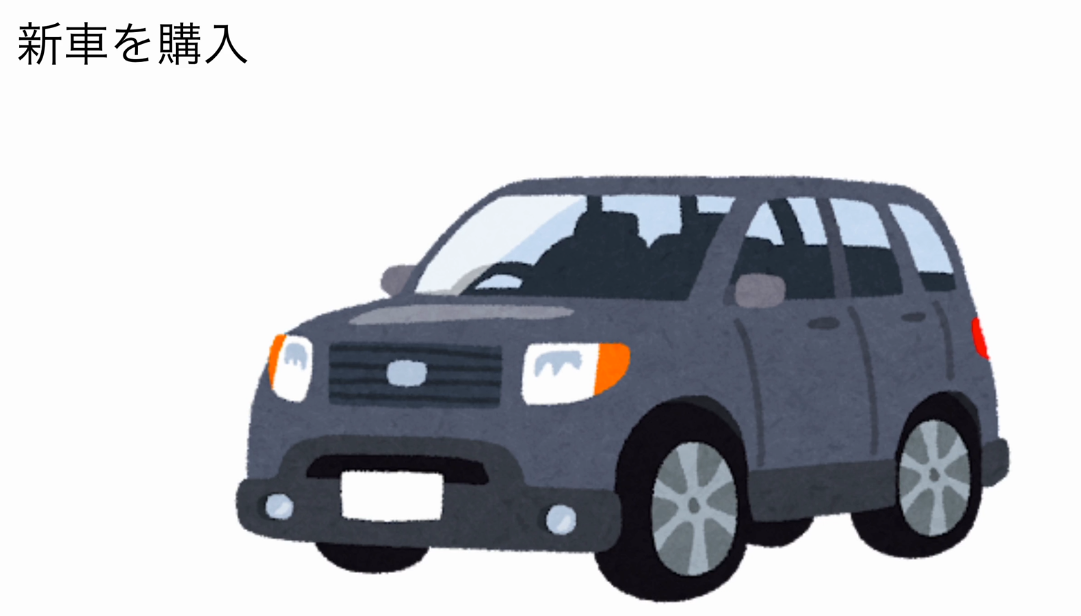
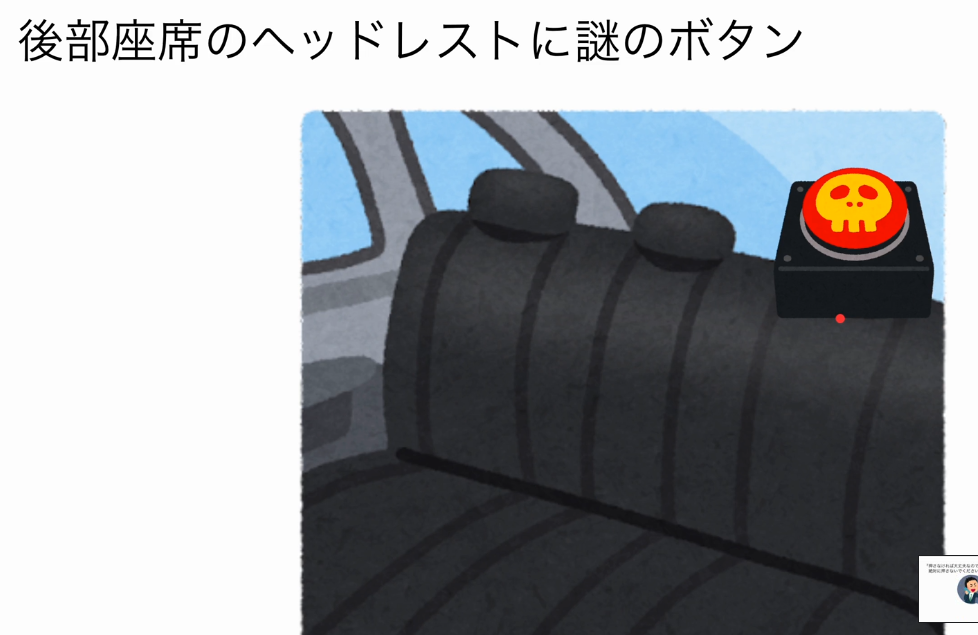
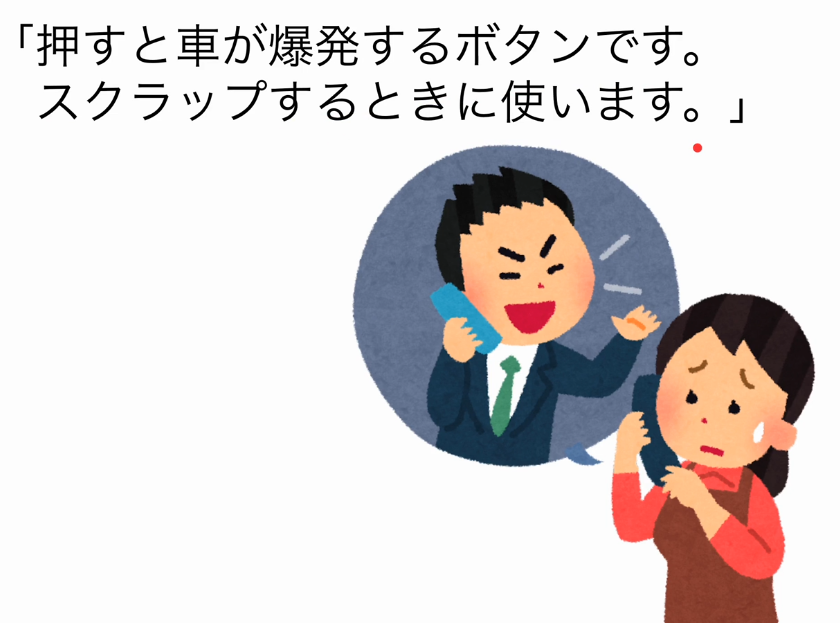
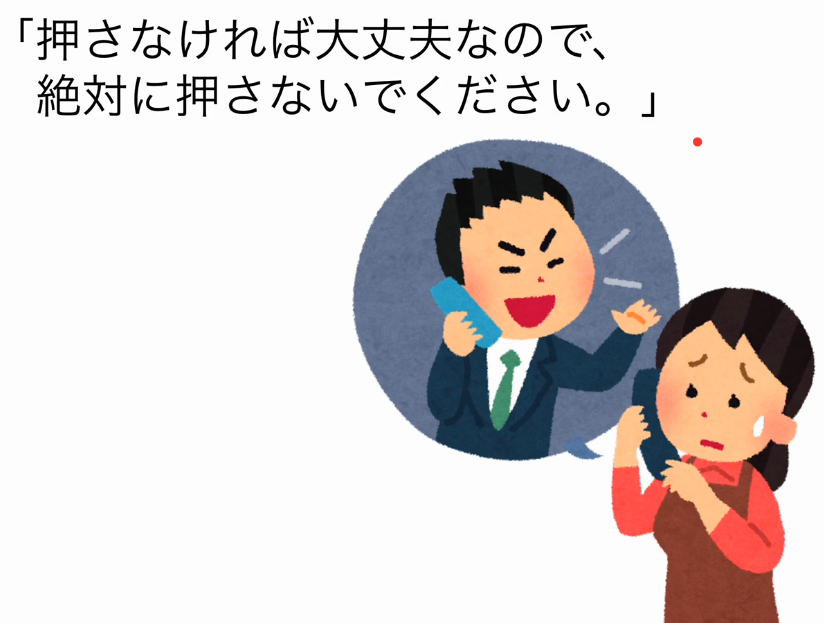
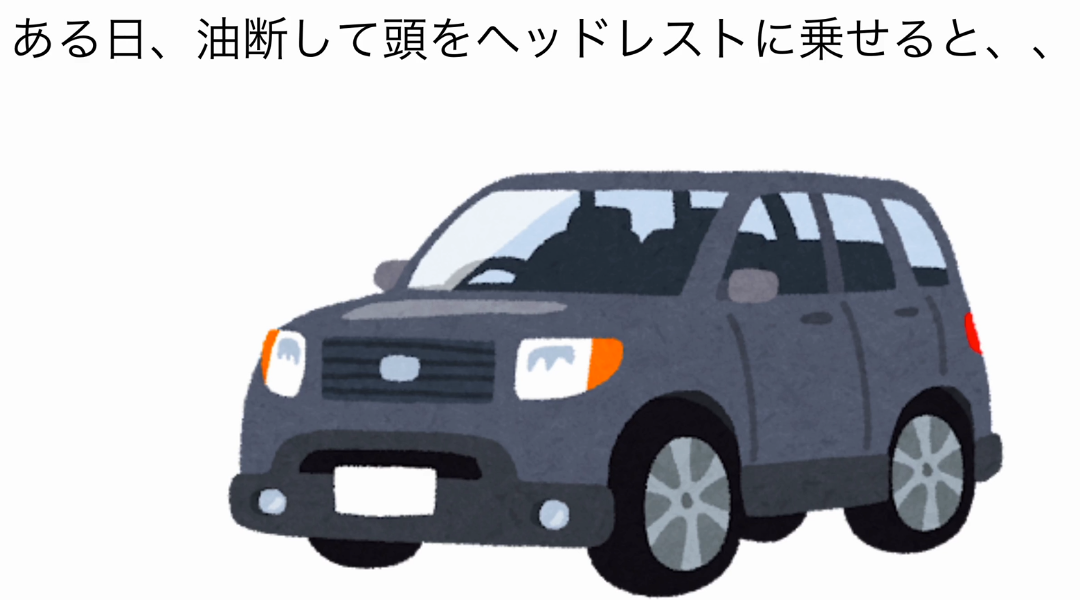
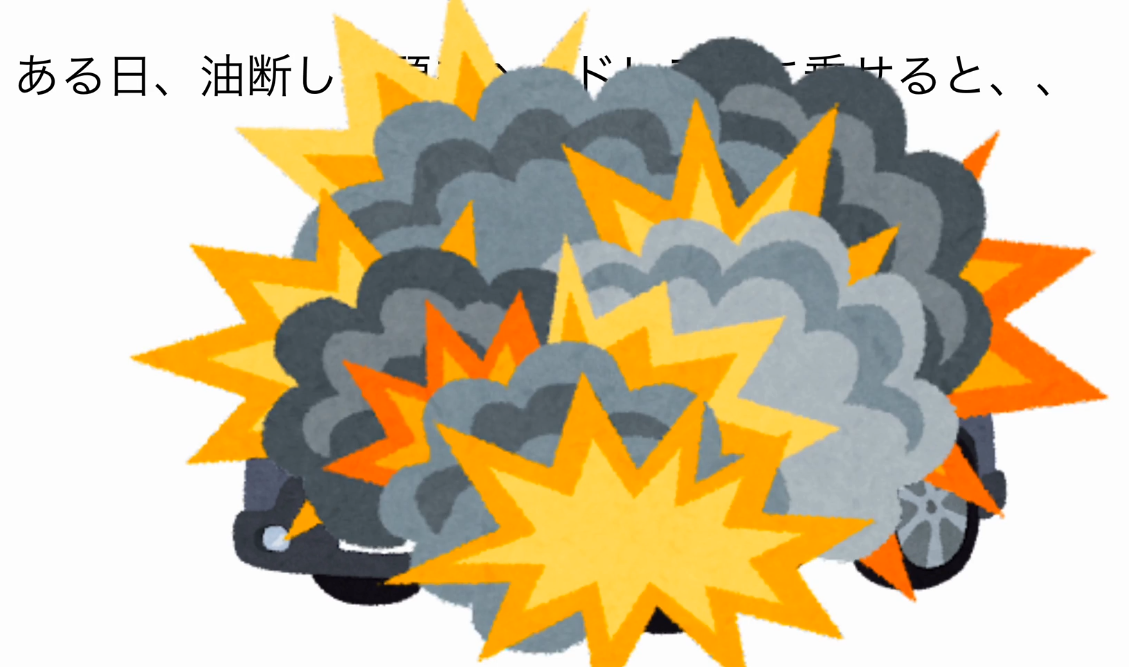


### Hyrumの法則（暗黙の依存関係の法則）

Googleのソフトウェアエンジニア、Hyrum Wrightが提唱した経験則

暗黙の依存関係の法則とも言う

**あるAPIに十分な数のユーザーがいるとき、**

**APIを作ったもの自身が契約仕様として何を約束しているかは重要ではない。**

**作られたシステムが持つあらゆる観察可能な挙動に関して、**

**それに依存するユーザーが出てくるものである。**

上記を言い換えると

APIを作った者がどういう契約仕様を約束しているか、**どのようなAPIを提供しているかは**、実際のところ重要ではないと。

何が重要かというと、実際にそのAPIがどんな観察可能な挙動を持っているのか(**ユーザーがAPIを使って何ができるか**)ということが重要である。

そのため、必然的にAPIの作成者が予想しているAPIの仕様方法とは異なったAPIの使い方をするユーザーが絶対に出てきてしまうものであるということ。

In [ ]:
def calculate_sum(input_list):
    return sum(input_list), 'Success' # 2つ目の戻り値は、ドキュメントでは定義されていない

In [ ]:
result, status = calculate_sum([1, 2, 3, 4, 5])
if status == 'Success': # ドキュメントで定義されていないものに依存している
    print('Calculation was successful!')
else:
    print('Calculation failed.')

上記の理由を踏まえて言えることは、、、

ユーザーは、あらゆる公開された仕様に対して依存する(API作者が推奨している正しいAPI使用方法があっても、APIが提供しているものであればどんなものでも、どんな方法でも使用する)ので、

使わないメソッドを公開するのは望ましくない。

つまり、**使えないメソッド OR 使われない想定をしたメソッドを公開するのは望ましくないということ。**

## ISPのメリット・デメリット

一言で言えば、ISPは

**太ったインターフェースをシェイプアップして、**

**インターフェースの凝集度を高めるための原則**

と言える

言い換えるなら、ISPは

**インターフェースに対して、SRPを実践するための原則**

とも言える

そのため、SRPと同じく、高凝集度・低結合度が得られるが、

次のような違いもある

*   SRP：クラスの責務が高凝集になり、責務間が疎結合になる
*   ISP：インターフェースが高凝集になり、クライアントと疎結合になる

主に、設計の手間が増えることが、デメリットと言える

が、メリットの方が基本的には大きい

## 他の原則との関係性

ISPは、インターフェースに対して、SRPを実践するための原則とも言える

ISPに違反して、サブクラスでメソッドを退化させると、LSPに違反する可能性が高い

## ISPのまとめ

*   インタフェース分離の原則（ISP）は、
  
  「クライアントに、クライアントが利用しないメソッドへの依存を強制してはならない」という原則
*   ISPの違反は、高結合度やSRP・LSPへの違反をもたらし、コードを変更しづらくする
*   ISPを守ることで太ったインターフェースをシェイプアップして、インターフェースの凝集度を高めることができる
*   インターフェースを分割する方法には、多重継承を使う方法と、コンポジションを使う方法がある
*   コンポジションを使うと、Strategyパターンと組み合わせることもできる
*   クライアントが使わないインターフェースは公開しない方が良い理由は、フールプルーフとHyrumの法則で説明できる
*   Hyrumの法則によると、開発者の意図によらず、ユーザーは観測可能なあらゆる仕様に依存する
*   ISPは大きなインターフェースを分割するので、SRPを守ることにもつながる
*   ISPに違反して、サブクラスでメソッドを退化させると、LSPに違反する可能性が高い

## ISPの演習問題

①ISPとはどのような原則でしょうか

これまでに学んだことを、できる限り多く思い出してみましょう

②Hyrumの法則とはどのような経験則だったでしょうか

また、Hyrumの法則の事例は何か他にあるでしょうか

③SRPとISPにはどのような共通点・相違点があるでしょうか

また、SRPとISPという2つの原則が両方とも必要な理由を

あなたなりに考えてみましょう（1つにまとめて良い、という結論も可です）

④以下の音楽ストリーミングサービスのコードは、

ISPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

ISPを満たすようにコードを改善してください

この音楽ストリーミングサービスでは、

無料ユーザーと有料ユーザーで使用できる機能が異なり、

次のようになっているとします

*   無料ユーザーは、広告有りの再生のみが可能
*   有料ユーザーは、広告なしの再生・一時停止・スキップが可能




In [ ]:
from abc import ABC, abstractmethod

class AbstractMusicPlayer(ABC):
    def __init__(self, playlist: list):
        self.playlist = playlist

    @abstractmethod
    def play(self) -> None:
        pass

    @abstractmethod
    def pause(self) -> None:
        pass

    @abstractmethod
    def skip(self) -> None:
        pass

class FreeUserMusicPlayer(AbstractMusicPlayer):
    def play(self) -> None:
        print('広告表示')
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        pass

    def skip(self) -> None:
        pass

class PaidUserMusicPlayer(AbstractMusicPlayer):
    def play(self) -> None:
        print('再生します')
        # 再生処理

    def pause(self) -> None:
        print('一時停止します')
        # 一時停止処理

    def skip(self) -> None:
        print('スキップします')
        # スキップ処理

⑤以下のATMを表現したコードは、

ISPに違反しているでしょうか

違反している場合は、その理由を述べた上で、

ISPを満たすようにコードを改善してください

ただし、ATMで行える操作は、

*   引き出し
*   預け入れ
*   振り込み

の3つであり、

これらの操作は1つのトランザクションで1つだけ行われます

また、BankAccountは銀行口座を表す値オブジェクトであるとします

In [ ]:
class ATMInterface(ABC):
    @abstractmethod
    def withdraw_transaction(self, amount: int) -> None:
        pass

    @abstractmethod
    def deposit_transaction(self, amount: int) -> None:
        pass

    @abstractmethod
    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        pass

class ATM(ATMInterface):
    def __init__(self, bank_account: BankAccount):
        self.bank_account = bank_account

    def withdraw_transaction(self, amount: int) -> None:
        # 引き出し処理
        print('出金成功')

    def deposit_transaction(self, amount: int) -> None:
        # 預け入れ処理
        print('入金成功')

    def transfer_transaction(self, to_bank_account: BankAccount, amount: int) -> None:
        # 振り込み処理
        print('振込成功')